# Modelling

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

Hide warnings

In [2]:
pd.options.mode.chained_assignment = None

## Load data

In [3]:
df = pd.read_pickle("Data.pkl")
df.head()

,target,house_block_structure,house_in_complex,house_semi,house_backyard,house_room_flat,house_caravan_tent,house_other,school_attendance,satellite_tv,...,electricity,water_dwelling_institution,water_yard,lat,lon,NL,house_informal,lang_euro,water_community,person_household
ward,,,,,,,,,,,,,,,,,,,,,
41601001: Ward 1,16.773757,0.933841,0.000676,0.001372,0.005750,0.002823,0.001431,0.008224,0.260191,0.283468,...,0.919424,0.742692,0.214027,-29.682270,24.734743,0.292039,0.039546,0.845249,0.043281,3.0
41601002: Ward 2,21.496661,0.696940,0.000000,0.001323,0.007575,0.001486,0.001253,0.008010,0.290228,0.103641,...,0.959259,0.309294,0.576844,-29.119311,24.757737,3.207775,0.275457,0.888100,0.113862,3.0
41601003: Ward 3,10.931425,0.810545,0.003986,0.000956,0.006686,0.000000,0.000000,0.004150,0.186435,0.165772,...,0.826164,0.323393,0.483376,-29.142276,25.094093,0.000000,0.152534,0.581537,0.193231,3.0
41601004: Ward 4,23.119257,0.659914,0.000000,0.037245,0.005255,0.000000,0.000000,0.002947,0.281229,0.087768,...,0.986151,0.677437,0.314194,-29.372052,24.942867,2.038778,0.287695,0.750342,0.008369,3.0
41601005: Ward 5,13.652252,0.950575,0.000598,0.000818,0.004985,0.008693,0.000000,0.000673,0.196687,0.345975,...,0.957376,0.771106,0.194743,-29.409381,25.290165,0.000000,0.024532,0.436975,0.034150,3.0


## Train/test split

In [4]:
y = df.target
df.drop(['target'], axis=1, inplace=True)
df.columns

Index(['house_block_structure', 'house_in_complex', 'house_semi',
       'house_backyard', 'house_room_flat', 'house_caravan_tent',
       'house_other', 'school_attendance', 'satellite_tv', 'has_car',
       'landline_ownership', 'lang_isiNdebele', 'lang_isiXhosa',
       'lang_isiZulu', 'lang_sepedi', 'lang_sesotho', 'lang_setswana',
       'lang_sign', 'lang_siSwati', 'lang_tshivenda', 'lang_xitsonga',
       'lang_other', 'race_black', 'race_coloured', 'race_indian_asian',
       'race_white', 'race_other', 'electricity', 'water_dwelling_institution',
       'water_yard', 'lat', 'lon', 'NL', 'house_informal', 'lang_euro',
       'water_community', 'person_household'],
      dtype='object')

The test size is going to be 30% of the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print('Training set has', X_train.shape, 'shape')
print('Test set has', X_test.shape, 'shape')

Training set has (1974, 37) shape
Test set has (847, 37) shape


## Model: Decision Trees

Fitting the model

In [6]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

### Model evaluation

In [7]:
y_pred = tree_model.predict(X_test)
print(f'Mean squared Error: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')
print(f'Mean absolute Error: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}')
print(f'R2 score: {r2_score(y_true=y_test, y_pred=y_pred)}')

Mean squared Error: 27.071727256830613
Mean absolute Error: 3.8753786784093274
R2 score: 0.7410817644372201


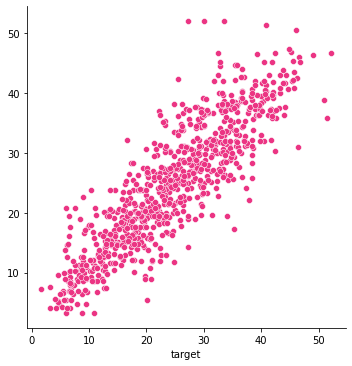

In [8]:
sns.relplot(x=y_test, y=y_pred, kind="scatter", color='#eb3483')

### Cross validation

In [9]:
cv_scores = cross_val_score(estimator=tree_model, X=df, y=y, scoring="r2", cv=10)
cv_scores

array([0.45373778, 0.51449154, 0.74725434, 0.57401545, 0.50568912,
       0.71170738, 0.47915778, 0.59292169, 0.63393704, 0.52538664])

In [10]:
cv_scores.mean()

0.5738298755565188

This isn't a very good R2 and it isn't constant between tests

## Model: LinearRegression

We are not going to work with geographical data with this model

In [11]:
X_train.drop(['lat', 'lon'], axis=1, inplace=True)
X_test.drop(['lat', 'lon'], axis=1, inplace=True)
print('Training set has', X_train.shape, 'shape')
print('Test set has', X_test.shape, 'shape')

Training set has (1974, 35) shape
Test set has (847, 35) shape


Fitting the model

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
lr_model.coef_

array([-3.29420658e+00,  5.29384260e-01, -2.21200526e+00, -1.27647598e+01,
       -2.90239364e+01, -2.07288538e+01, -2.79612398e+01,  5.99889692e+01,
       -3.15711509e+00, -3.51045605e+01,  1.68041185e+01, -1.57473998e+01,
       -1.75486624e+01, -1.64352145e+01, -1.20387024e+01, -1.23639643e+01,
       -1.63314225e+01, -2.20965265e+01, -1.56664407e+01, -1.43110108e+01,
       -1.14004981e+01, -2.49389740e+01, -3.29415605e+07, -3.29415598e+07,
       -3.29415528e+07, -3.29415494e+07, -3.29415653e+07,  3.54063668e+00,
        5.47676737e+06,  5.47677166e+06, -3.96030922e-02, -8.55329492e+00,
       -1.85488416e+01,  5.47677410e+06, -5.29211708e-01])

### Model evaluation

In [14]:
y_pred = lr_model.predict(X_test)
print(f'Mean squared Error: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')
print(f'Mean absolute Error: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}')
print(f'R2 score: {r2_score(y_true=y_test, y_pred=y_pred)}')

Mean squared Error: 15.116050192883472
Mean absolute Error: 2.9808519414361574
R2 score: 0.8554277306545969


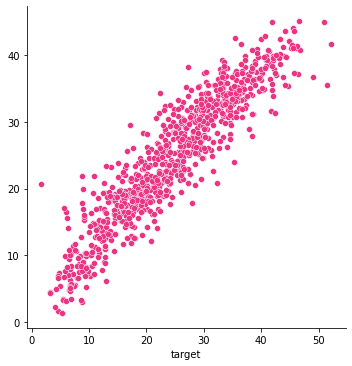

In [15]:
sns.relplot(x=y_test, y=y_pred, kind="scatter", color='#eb3483')

### Cross validation

In [16]:
cv_scores = cross_val_score(estimator=lr_model, X=df, y=y, scoring="r2", cv=10)
cv_scores

array([0.74377571, 0.73798624, 0.83234833, 0.76397282, 0.63977621,
       0.87614065, 0.78734786, 0.81031107, 0.81916336, 0.75049073])

In [17]:
cv_scores.mean()

0.7761312977296918

This model has a constant R2 value between tests. It has a relatively good score too